<h1>Gaia Star Cluster Hertzsprung Russel Diagrams (HRD)</h1>

Here are some useful links 
- [European Space Agency Gaia Mission - Writing Queries Turorial](https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries)
- [Gaia's Hertzsprung-Russel Diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram)

**In the examples below we will query open clusters in the Milky way and plot it in a Hertzsprung-Russel Diagram (HRD). We will also attempt to identify Zero-order Main Sequence (ZAMS) entry points and Main Sequence Cutoff for these star clusters**

*adapted for the Python for Astronomy Course by Chandru Narayan Nov 1, 2022 using the material develped by Dr. Priya Hasan*


In [1]:
#!echo $PATH  Remove leading '#' for debugging as needed

In [2]:
# Data Folder
data_folder="data_folder"
!ls -l {data_folder}

total 117256
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru    33553 Nov 11 01:44 M45_HRD.png
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru  1239812 Nov 11 00:56 gaia-hrd-d3-10000-stars.csv
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru 11366397 Oct 28 03:13 gaia-hrd-dr2-200pc_100000_stars.csv
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru   354425 Nov  5 01:05 gaia-hrd-dr2-200pc_100000_stars.csv.png
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru  1609851 Oct 30 17:11 gaia-hrd-dr2-200pc_10000_stars.csv
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru   240040 Nov  5 01:05 gaia-hrd-dr2-200pc_10000_stars.csv.png
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru 47881808 Nov  5 01:05 gaia-hrd-dr2-200pc_500000_stars.csv
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru 17197812 Nov  4 02:50 gaia-hrd-dr2-200pc_500000_stars_pt_1_3.csv
-rw-r--r-- 1 jupyter-pythondru jupyter-pythondru 17195742 Nov  4 02:50 gaia-hrd-dr2-200pc_500000_stars_pt_2_3.csv
-rw-r--r-- 1 jupyter-pythondru jupyt

In [3]:
#!pip list  # for debugging as needed

In [4]:
#EXECUTE THIS CELL THEN RESTART KERNEL
#!pip install astroquery  # for debugging as needed
#!pip install scikit-learn # for debugging or as needed

In [5]:
# Create Access to the Gaia Database
from astroquery.gaia import Gaia

# Load Tables from the Gai Database
tables = Gaia.load_tables(only_names=True)

# Print the Table Names in the Gaia Database
for table in tables:
    print(table.name)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaia

In [6]:
# Get Gaia Sources Table
meta = Gaia.load_table('gaiadr3.gaia_source')
print(meta)

Retrieving table 'gaiadr3.gaia_source'
TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [7]:
# Print all columns in the Gaia Source Table
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

## Open Star Cluster M45 in Orion has younger stars
![m45](m45.png)
## Globular Star Cluster M92 in Hercules is VERY OLD!
![m92](m92.png)
## The Gaia Sattelite
Gaia is a space observatory of the European Space Agency, launched in 2013 and expected to operate until 2025. The spacecraft is designed for astrometry: measuring the positions, distances and motions of stars with unprecedented precision.
Gaia  provides astrometry, photometry, and spectroscopy of more than 1000 million stars in the Milky Way. Also data for significant samples of extragalactic and Solar system objects is made available. The Gaia Archive contains deduced positions, parallaxes, proper motions, radial velocities, and brightnesses. Complementary information on multiplicity, photometric variability, and astrophysical parameters is provided for a large fraction of sources.
![gaia](gaia.png)


## Gaia Data

Gaia Data primarily contains of - Right Ascension (RA), Declination (Dec), Parallax, Radial Velocity (RV), Proper Motion in terms of Right Ascension (pmra), and Proper Motion in terms of Declination (pmdec).

1. ✅ **Right Ascension and Declination**- They are the longitude and latitude to position an object in the celestial frame of reference, or they are the celestial coordinates. They are calculated as positions in the plane of the sky. Read more about them at [https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/).
[(Image Source)](https://en.wikipedia.org/wiki/Right_ascension)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Ra_and_dec_demo_animation_small.gif" alt="RA Dec" style="width: 50%; float:center;"/> 

2. ✅ **Parallax**- The effect which causes an apparent shift in the position of an object with request to a background when observed from two different points (separated by a distance called basis) It is calculated as the semi-angle of inclination of these two different line of sights from the observation points to the object. Image source and more at: [https://en.wikipedia.org/wiki/Parallax](https://en.wikipedia.org/wiki/Parallax) 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Stellarparallax2.svg/340px-Stellarparallax2.svg.png" alt="Parallax" style="width: 50%; float:center;"/>

3. ✅ **Radial Velocity**- It is the velocity of an object in a direction away from or towards the Earth (observation point). In a more general sense, it is the velocity between the object and the observation point in the direction of the radius connecting the point and the object

4. ✅ **Proper Motions (RA and Dec)**- Proper Motion is the rate of angular drift in the plane of the sky or in a transverse direction. In other words, pmra and pmdec are the rates of change of the RA and Dec of an object in the sky respectively. Their resultant is also called the transverse velocity or total proper motion. The space velocity of an object is the resultant of the transverse velocity and the radial velocity

### Gaia Data Releases

Gaia data is made publicly available through periodic data releases (DRs). Each Data Release has a richer data than the previous data release as Gaia covers the stars more times and adds new stars and objects as well. We had two full releases (DR1 and DR2)  until now, and an Early Data Release 3 (EDR3) is the latest update. We will be working with the most recent full release, DR2. You can also try working with EDR3 with almost negligible changes to the queries we use here.


### Gaia Archive

Gaia Archive is a remote server which hosts the publicly available Dsta Releases of Gaia in the form of a database. It also provides us an interface to query the data and manipulate it according to our needs on the server itself, without us having the need to download the data first on our local computers. Using the Gaia archive site, we can get data on the positions, brightnesses, distances, and more for millions of stars and do various kinds of science and data visualization from them.

**The Gaia archive can be found here: https://gea.esac.esa.int/archive/**



## Basic Search for Manual Gaia Query and Download
Task: We will use the Basic Search in Gaia Archive to get data of a cluster M45 (Pleiades,  Seven Sisters) in 20 arcminutes radius circle around  it.  We will then read this data in Python and plot the required data.
Steps for Basic Search:

Make sure you're on the Basic query page
In the "Name" field, type in "Messier 45". It should resolve the name. 
To the right, put a "20" and then change the unit from "arc sec" to "arc min". This will tell the archive to search in a radius of 20 arcminutes around M45. There are 60 arcseconds in an arcminute, and 60 arcminutes in a degree.
At the bottom, change "Max. number of results" to 5000. 
Make sure that the "Search In" drop down says "gaiaedr3.gaia_source". This specifies the data we want to use is frrom source of Gaia DR2
Click "Submit Query"
You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.

In [8]:
%%html
<div style="text-align:center;">
<iframe src="https://gea.esac.esa.int/archive/" width="800" height="540"></iframe>
</div>

In [9]:
# For use with Manual Search SKIP FOR NOW 

# Now we can read the csv file into a pandas dataframe. 

# m45 = pd.read_csv('m45.csv') # I renamed my csv file to 'm5.csv' and put it in the the subfolder 'data'

# Checking the top few rows of the data and the number of rows and columns
# print("(Rows, Columns) =", m45.shape)
# m45.head()

#### Sample WHERE CLAUSE for radial search as needed SKIP FOR NOW 

#job = Gaia.launch_job_async("SELECT * \
#FROM gaiadr1.gaia_source \
#WHERE CONTAINS(POINT(gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE(56.75,24.1167,2))=1;" \
#, dump_to_file=True)

#print (job)



## Setup for API Gaia Target Cone Search and Download

In [10]:
# Parameters for API Query & HRD (20 minutes radius around M45 center) - Change for each query!
target = "M45" # target to query
object_radius = 20 # in arc minutes
object_radius_deg = object_radius/60
num_stars = 5000 #maximum number of stars to retrieve

In [11]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [12]:
# import astroquery and astropy packages
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


In [13]:
## making a GAIA cone_search

coordinate = coord.SkyCoord.from_name(target)
print(coordinate)
radius = u.Quantity(1, u.deg) * object_radius_deg
print(radius)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius, table_name="gaiaedr3.gaia_source")
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (56.601, 24.114)>
0.3333333333333333 deg
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [14]:
r

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 65225091345088128,65225091345088128,1482231621,2016.0,56.59963810201321,0.3717882,24.10778382493263,0.28914028,1.0024194299286826,0.47639441,2.1041796,12.013329,9.238974686426307,0.57810557,-7.678633066848878,0.39809188,0.1464724,0.051033136,-0.14710301,-0.0545679,-0.5537224,-0.022863338,0.4215042,0.12037383,-0.315241,0.34808978,253,0,252,1,0.35150412,267.0525,0.0,0.0,95,False,--,1.3617803,0.09364224,-0.27782676,-0.015594657,-0.09872172,-0.19782314,-0.06303625,29,15,0.83765906,33,10,0,0.0387211,152.30899,0,0,1.014527,0.27702203,0.37754956,0.42803854,0.48751542,-84.44034,-11.928195,-38.33594,33.010754,False,274,303.82747639330097,1.0535188,288.39304,19.480799,28,163.30179526665114,12.3774,13.193545,19.806065,26,226.82232253951796,14.972068,15.149699,18.85868,0,2,0,1,0,1.2840317,0.9473839,0.32526588,0.622118,--,--,0,--,--,--,166.46632059571482,-23.6200093439862,59.75054085605811,4.107749418609412,0.006337645533624978
1636042515805110273,Gaia EDR3 65225130001307776,65225130001307776,1475200097,2016.0,56.60792029955101,15.120778,24.1152923724622,8.427679,--,--,--,--,--,-

In [15]:
## save the ASCII table as a pandas dataframe
all_stars = r.to_pandas()
all_stars
type(all_stars)

pandas.core.frame.DataFrame

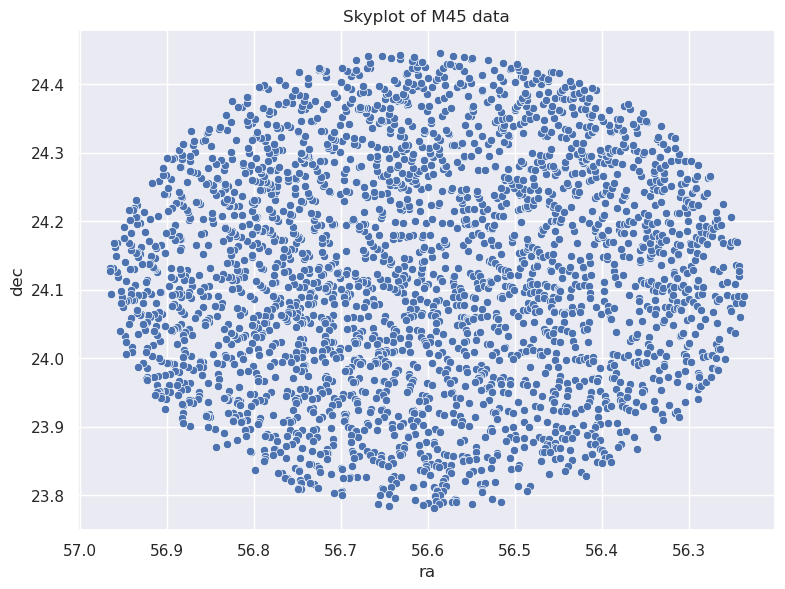

In [16]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(9,6.5)})

skyplot = sns.scatterplot(x='ra', y='dec', data = all_stars)
#skyplot = sns.scatterplot(x='ra', y='dec', data = members)
skyplot.invert_xaxis()
plt.title('Skyplot of ' + target + ' data')
plt.show()

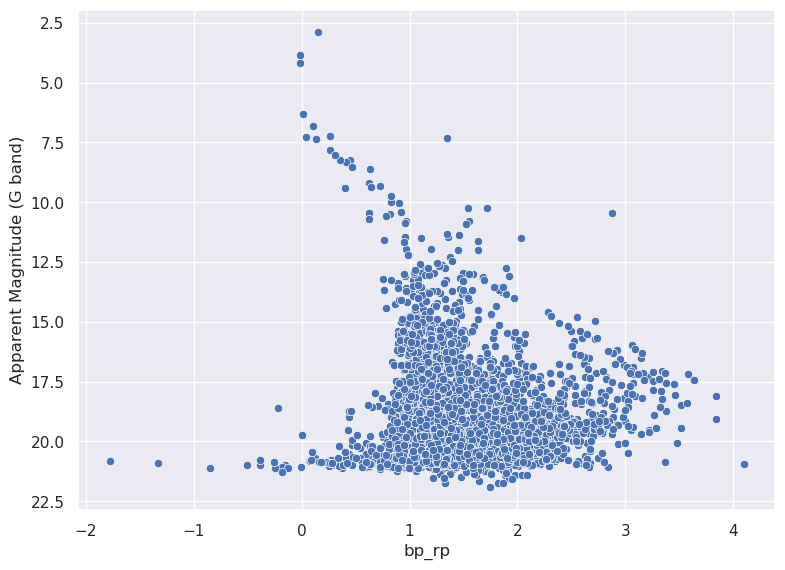

In [17]:
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = all_stars)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

<AxesSubplot:xlabel='pmra', ylabel='pmdec'>

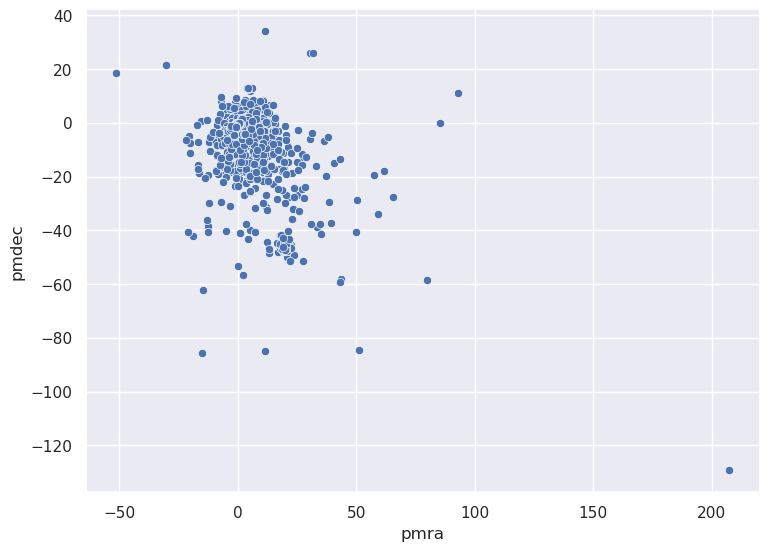

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,6.27)})

#sns.scatterplot(x='pmra', y='pmdec', data=features[features.labels > -1], hue='labels',legend='full')

sns.scatterplot(x='pmra', y='pmdec', data=all_stars)

<AxesSubplot:xlabel='pmra', ylabel='pmdec'>

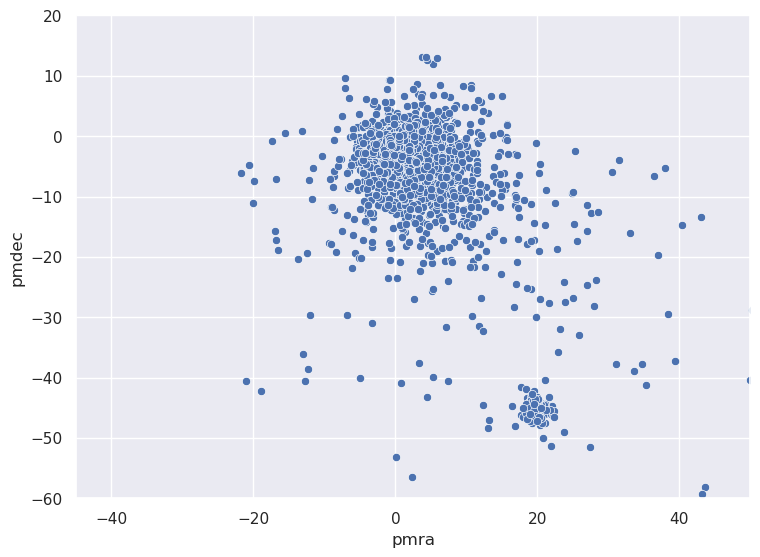

In [19]:
# limit ranges to zoom in
plt.xlim(-45,50)
plt.ylim(-60,20)
sns.scatterplot(x='pmra', y='pmdec', data=all_stars)

(-20.0, 40.0)

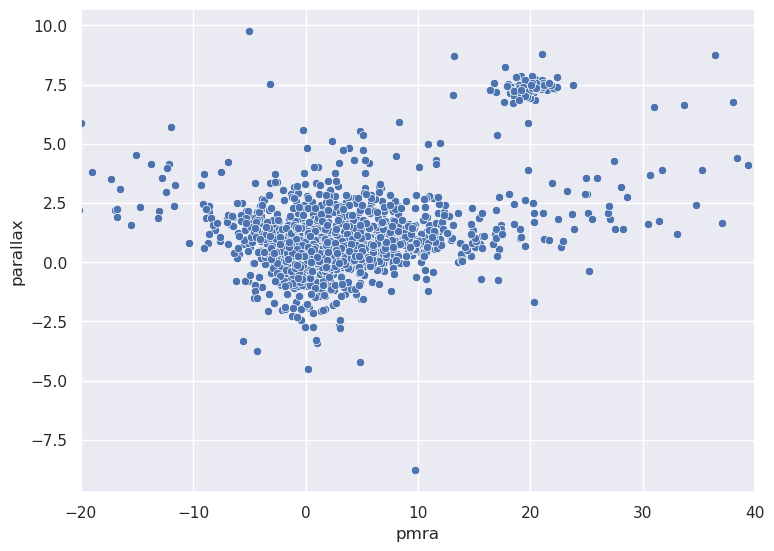

In [20]:
sns.scatterplot(x='pmra', y='parallax', data=all_stars)
plt.xlim([-20,40])

(-70.0, 20.0)

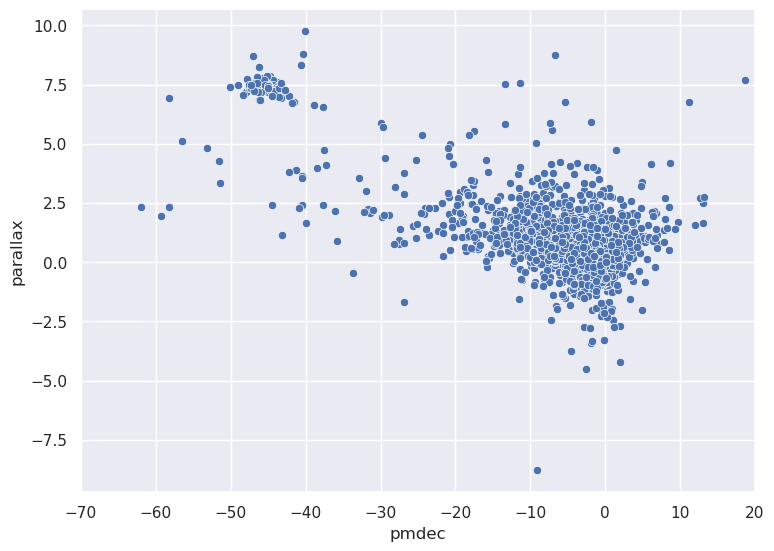

In [21]:
sns.scatterplot(x='pmdec', y='parallax', data=all_stars)
plt.xlim([-70,20])

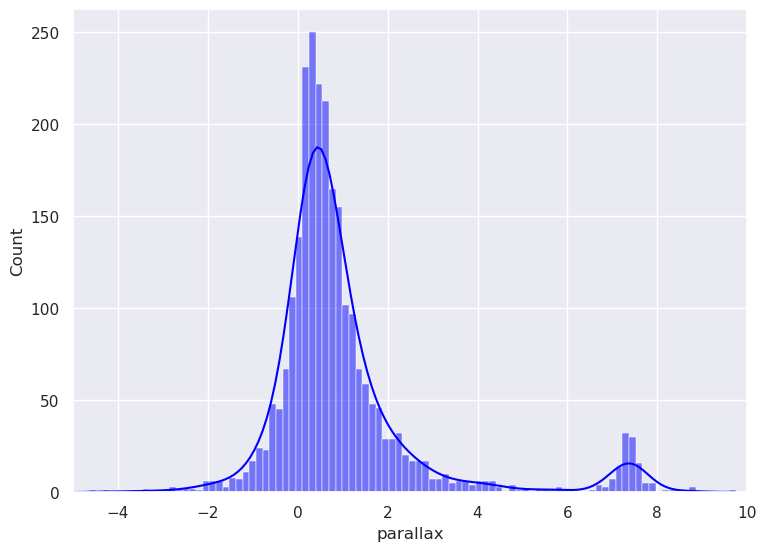

In [22]:
sns.histplot(x='parallax', data=all_stars,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
#plt.legend()
plt.xlim([-5,10])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


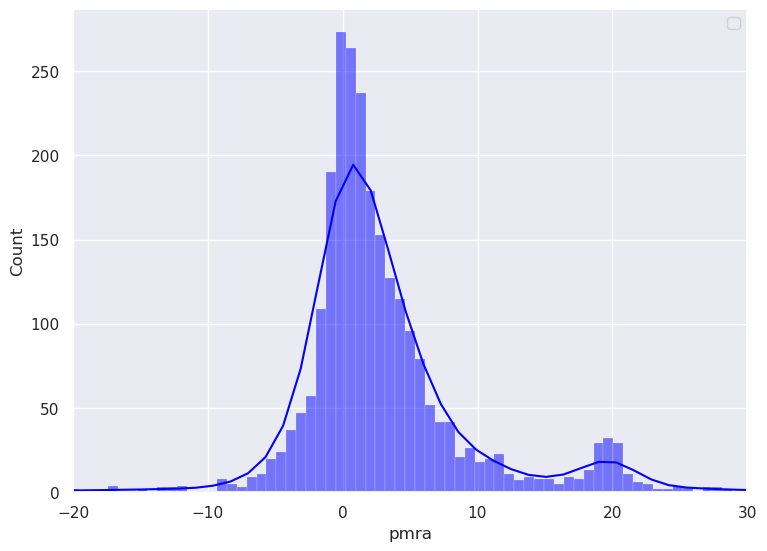

In [23]:
sns.histplot(x='pmra', data=all_stars,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.legend()
plt.xlim([-20,30])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


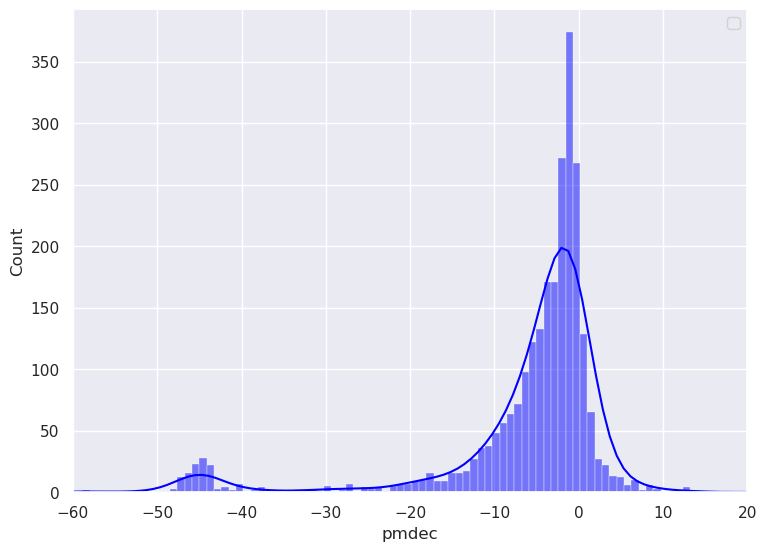

In [24]:
sns.histplot(x='pmdec', data=all_stars,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.xlim([-60,20])
plt.legend()
plt.show()

In [25]:
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
count,2.927000e+03,2.927000e+03,2.927000e+03,2927.0,2927.000000,2927.000000,2927.000000,2927.000000,2553.000000,2553.000000,...,71.000000,2927.000000,71.000000,71.000000,71.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,1.636043e+18,6.563266e+16,9.239564e+08,2016.0,56.605572,1.136737,24.122601,0.810932,1.006198,0.448121,...,3.336374,0.175265,5190.140625,3.598592,-0.169014,166.459764,-23.605199,59.759131,4.121103,0.218650
std,0.000000e+00,6.642450e+14,5.245968e+08,0.0,0.182177,3.480476,0.162365,2.423839,1.775541,0.448333,...,3.452522,1.148729,730.049927,0.607217,0.477670,0.183732,0.160199,0.164848,0.164235,0.079226
min,1.636043e+18,6.519193e+16,5.396600e+04,2016.0,56.236885,0.012181,23.781850,0.008992,-8.791216,0.014245,...,0.163520,0.000000,4000.000000,3.000000,-1.500000,166.099471,-23.946664,59.419706,3.782317,0.006338
25%,1.636043e+18,6.521550e+16,4.633514e+08,2016.0,56.456765,0.118823,23.995399,0.085056,0.180700,0.114601,...,0.778168,0.000000,4500.000000,3.000000,0.000000,166.309044,-23.728987,59.629789,3.991244,0.159612
50%,1.636043e+18,6.523080e+16,9.367930e+08,2016.0,56.610093,0.330569,24.119591,0.235462,0.577512,0.287605,...,2.137708,0.000000,5500.000000,3.500000,0.000000,166.463266,-23.602026,59.764184,4.119892,0.231972
75%,1.636043e+18,6.671133e+16,1.398246e+09,2016.0,56.750508,0.829884,24.254645,0.582078,1.197278,0.632647,...,4.055761,0.000000,5500.000000,4.500000,0.000000,166.608403,-23.478181,59.892738,4.252150,0.284190
max,1.636043e+18,6.678503e+16,1.811695e+09,2016.0,56.965469,86.781815,24.446309,53.509377,9.743848,3.483384,...,12.802958,12.000000,6500.000000,4.500000,0.000000,166.823023,-23.283973,60.086417,4.442835,0.333257


In [26]:
all_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 100 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   solution_id                      2927 non-null   int64  
 1   DESIGNATION                      2927 non-null   object 
 2   source_id                        2927 non-null   int64  
 3   random_index                     2927 non-null   int64  
 4   ref_epoch                        2927 non-null   float64
 5   ra                               2927 non-null   float64
 6   ra_error                         2927 non-null   float32
 7   dec                              2927 non-null   float64
 8   dec_error                        2927 non-null   float32
 9   parallax                         2553 non-null   float64
 10  parallax_error                   2553 non-null   float32
 11  parallax_over_error              2553 non-null   float32
 12  pm                 

In [27]:
mask = (all_stars.parallax >= 6) & (all_stars.parallax <= 8.5) &(all_stars.pmra < 30) & (all_stars.pmra > 10)& (all_stars.pmdec > -50) & (all_stars.pmdec < -40)


In [28]:
members = all_stars[mask]

In [29]:
members.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
count,1.080000e+02,1.080000e+02,1.080000e+02,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,13.000000,108.000000,13.000000,13.000000,13.0,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.636043e+18,6.567517e+16,8.870613e+08,2016.0,56.630338,0.135999,24.115347,0.095344,7.363813,0.152292,...,4.063061,0.796296,4846.153809,4.000000,0.0,166.483361,-23.595410,59.779635,4.109061,0.218307
std,0.000000e+00,6.885208e+14,5.407761e+08,0.0,0.176697,0.193565,0.164836,0.130602,0.232411,0.212373,...,3.868434,2.282642,832.531616,0.677003,0.0,0.177476,0.163478,0.161951,0.164572,0.076151
min,1.636043e+18,6.519998e+16,1.414836e+07,2016.0,56.277338,0.012181,23.787510,0.008992,6.737442,0.014245,...,0.455941,0.000000,4000.000000,3.000000,0.0,166.110355,-23.905466,59.445111,3.783756,0.026672
25%,1.636043e+18,6.521410e+16,4.596727e+08,2016.0,56.475728,0.033905,23.992178,0.024575,7.231722,0.037741,...,1.197412,0.000000,4000.000000,3.500000,0.0,166.354987,-23.714403,59.639966,3.983901,0.158461
50%,1.636043e+18,6.522910e+16,8.401042e+08,2016.0,56.638711,0.084352,24.103659,0.063056,7.364441,0.096587,...,2.658926,0.000000,4500.000000,4.500000,0.0,166.517128,-23.594132,59.771760,4.098648,0.234661
75%,1.636043e+18,6.671459e+16,1.417170e+09,2016.0,56.789979,0.154463,24.254666,0.107203,7.491463,0.167927,...,5.959249,0.000000,5500.000000,4.500000,0.0,166.622171,-23.462908,59.932172,4.229489,0.273122
max,1.636043e+18,6.678245e+16,1.788943e+09,2016.0,56.943379,1.604912,24.433739,1.070261,8.231177,1.701455,...,12.513139,11.000000,6000.000000,4.500000,0.0,166.804312,-23.283973,60.051955,4.439714,0.332050


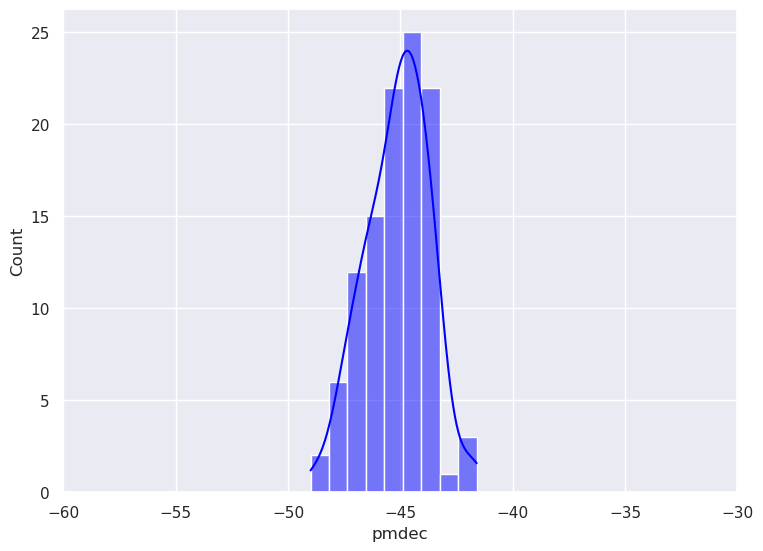

In [30]:
sns.histplot(x='pmdec', data=members,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.xlim([-60,-30])
#plt.legend()
plt.show()

In [31]:
members

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
17,1636042515805110273,Gaia EDR3 65226401312036864,65226401312036864,37892413,2016.0,56.630027,0.111463,24.117141,0.093256,7.393074,...,6.872885,8,4000.0,3.0,0.0,166.481886,-23.594446,59.779731,4.110792,0.026672
22,1636042515805110273,Gaia EDR3 65224889481112832,65224889481112832,1246291647,2016.0,56.608796,0.462524,24.085812,0.390092,7.572114,...,NaN,0,NaN,NaN,NaN,166.489188,-23.630672,59.753882,4.084479,0.029067
63,1636042515805110273,Gaia EDR3 65229734206151680,65229734206151680,1008964747,2016.0,56.605873,0.063788,24.159919,0.049626,7.190575,...,NaN,0,NaN,NaN,NaN,166.432717,-23.577557,59.767581,4.157363,0.046136
97,1636042515805110273,Gaia EDR3 65225611037551360,65225611037551360,937517718,2016.0,56.663990,0.017479,24.102995,0.015164,7.360922,...,1.154484,5,6000.0,3.5,0.0,166.517309,-23.584090,59.806944,4.090193,0.058531
155,1636042515805110273,Gaia EDR3 65224442806459008,65224442806459008,1643303265,2016.0,56.553723,0.014955,24.054171,0.012504,7.332498,...,NaN,0,NaN,NaN,NaN,166.471710,-23.687886,59.697734,4.064654,0.073775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,1636042515805110273,Gaia EDR3 65208396808627840,65208396808627840,1266433782,2016.0,56.922764,0.015220,23.971728,0.011432,7.367580,...,5.959249,8,4250.0,4.5,0.0,166.804312,-23.521908,60.009400,3.910484,0.326469
2877,1636042515805110273,Gaia EDR3 65199978672758272,65199978672758272,1788943396,2016.0,56.657097,0.017948,23.787510,0.014423,7.471863,...,0.455941,4,6000.0,4.5,0.0,166.744021,-23.821741,59.731486,3.783756,0.330487
2880,1636042515805110273,Gaia EDR3 65275501377570944,65275501377570944,815629557,2016.0,56.277338,0.162854,24.263309,0.123545,6.834920,...,NaN,0,NaN,NaN,NaN,166.114241,-23.701464,59.497376,4.324276,0.330860
2887,1636042515805110273,Gaia EDR3 66734514652754688,66734514652754688,30292951,2016.0,56.824750,1.604912,24.375293,1.070261,7.577743,...,NaN,0,NaN,NaN,NaN,166.436008,-23.283973,60.010087,4.323836,0.331504


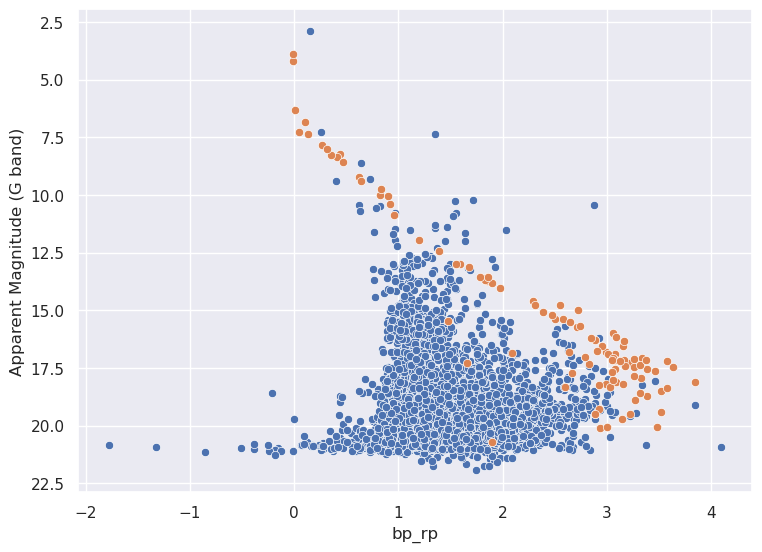

In [32]:

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = all_stars)
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = members)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

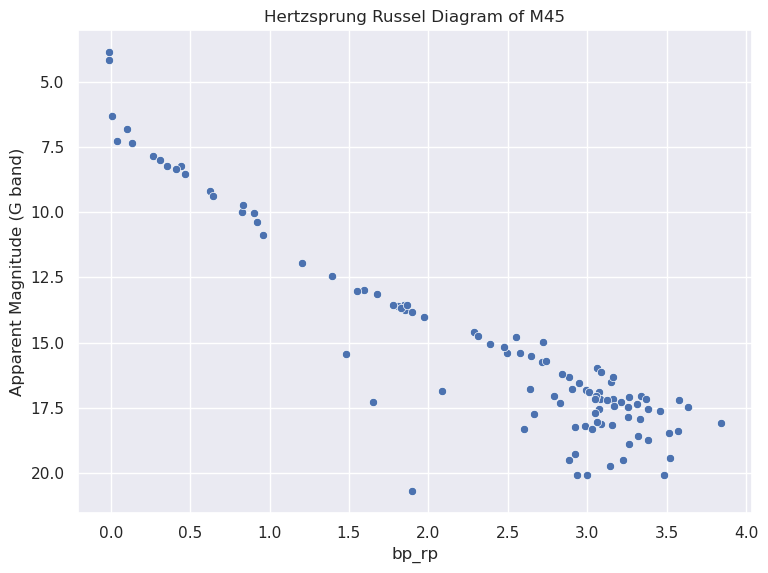

In [33]:
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = members)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)
plt.gca().invert_yaxis()
plt.title('Hertzsprung Russel Diagram of ' + target)
out_file="{}/{}_HRD.png".format(data_folder,target)
plt.savefig(out_file)

## Your Assignment: Plot HRD for a few other clusters M44, NGC1893, M4, NGC581, M92, M13) to see the similarities and differences in HRDs.
